In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/         #path configure
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10    #dataset api

100% 715M/715M [00:33<00:00, 23.1MB/s]
100% 715M/715M [00:33<00:00, 22.2MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 59.6 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
import os      #dependencies
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
len(filenames)

50000

In [13]:
print(filenames[0:5])
print(filenames[-5:])

['22743.png', '31865.png', '17372.png', '47204.png', '26266.png']
['32357.png', '30990.png', '37512.png', '46151.png', '11370.png']


**Label Processing**

In [14]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [15]:
labels_df.shape

(50000, 2)

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [18]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [20]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [21]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [22]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


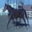

In [23]:
# displaying sample image
import cv2                  # image to numpy array to image
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/500.png')
cv2_imshow(img)

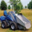

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/4588.png')
cv2_imshow(img)

In [25]:
labels_df[labels_df['id'] == 4588]

,id,label
4587,4588,truck


In [26]:
id_list = list(labels_df['id'])


In [27]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [28]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [29]:
type(data)

list

In [30]:
len(data)

50000

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data[0].shape

(32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
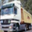

In [33]:
data[1]

In [34]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [36]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [39]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [40]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

**Network Building**

In [41]:
import tensorflow as tf     # keras is wrapper of libraries
from tensorflow import keras

In [42]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),       #input layer
    keras.layers.Dense(64, activation='relu'),         #hidden layer
    keras.layers.Dense(num_of_classes, activation='softmax')    #output layer    softmax is used for more than 2 classes
])

In [43]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',   # sparse is used because of numerical values of labels btw 0-9
              metrics=['acc'])

In [44]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 7s 4ms/step - loss: 2.0651 - acc: 0.2311 - val_loss: 1.9585 - val_acc: 0.2603
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9582 - acc: 0.2708 - val_loss: 1.9128 - val_acc: 0.2700
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9264 - acc: 0.2862 - val_loss: 1.8839 - val_acc: 0.2973
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.9111 - acc: 0.2932 - val_loss: 1.8774 - val_acc: 0.2873
Epoch 5/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8954 - acc: 0.3004 - val_loss: 1.8958 - val_acc: 0.2985
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8842 - acc: 0.3033 - val_loss: 1.8583 - val_acc: 0.3045
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8782 - acc: 0.3036 - val_loss: 1.8659 - val_acc: 0.3088
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

**ResNet50**


In [45]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [46]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))   # resnet50 is trained on pretrained data and transfer learning is used. include top false will drop output layer and 256 256 3 is the accepted size of image in resnet50
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [47]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))    # pixel conversion from 32 to 256
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())            # output normalized results to each hidden layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))                 # some neurons are turned off to avoid overfitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [48]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [49]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 486s 400ms/step - loss: 2.0143 - acc: 0.2704 - val_loss: 2.0279 - val_acc: 0.3090
Epoch 2/10
1125/1125 [==============================] - 450s 400ms/step - loss: 1.4689 - acc: 0.4698 - val_loss: 1.2242 - val_acc: 0.5548
Epoch 3/10
1125/1125 [==============================] - 450s 400ms/step - loss: 1.2267 - acc: 0.5721 - val_loss: 1.1134 - val_acc: 0.6080
Epoch 4/10
1125/1125 [==============================] - 451s 401ms/step - loss: 1.0750 - acc: 0.6329 - val_loss: 0.8655 - val_acc: 0.6908
Epoch 5/10
1125/1125 [==============================] - 451s 401ms/step - loss: 0.9710 - acc: 0.6717 - val_loss: 1.1979 - val_acc: 0.6202
Epoch 6/10
1125/1125 [==============================] - 451s 401ms/step - loss: 0.8753 - acc: 0.7062 - val_loss: 0.9325 - val_acc: 0.6812
Epoch 7/10
1125/1125 [==============================] - 451s 401ms/step - loss: 0.7975 - acc: 0.7381 - val_loss: 0.7263 - val_acc: 0.7575
Epoch 8/10
1125/1125 [============

In [50]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 41s 125ms/step - loss: 0.6884 - acc: 0.7842
Test Accuracy = 0.7842000126838684


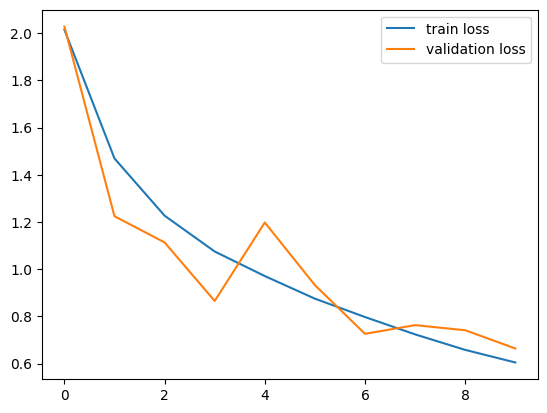

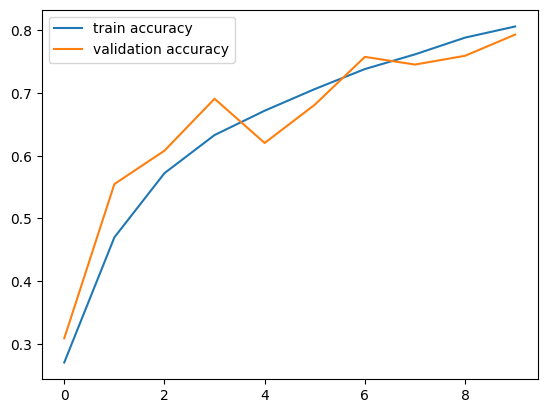

In [51]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()